# HTTP Request/Response Cycle - Codealong

##  Introduction
When developing a Web application, as we saw in the previous lesson, the request/response cycle is a useful guide to see how all the components of the app fit together. The request/response cycle traces how a user's request flows through the app. Understanding the request/response cycle is helpful to figure out which files to edit when developing an app (and where to look when things aren't working). This lesson will show how this setup works using python. 

## Objectives

You will be able to: 

* Explain the HTTP request/response cycle
* List the status codes of responses and their meanings
* Obtain and interpret status codes from responses
* Make HTTP GET and POST requests in python using the `requests` library

## The `requests` Library in Python

Dealing with HTTP requests could be a challenging task  any programming language. Python with two built-in modules, `urllib` and `urllib2` to handle these requests but these could be very confusing  and the documentation is not clear. This requires the programmer to write a lot of code to make even a simple HTTP request.

To make these things simpler, one easy-to-use third-party library, known as` Requests`, is available and most developers prefer to use it instead or urllib/urllib2. It is an Apache2 licensed HTTP library powered by urllib3 and httplib. Requests is add-on library that allows you to send HTTP requests using Python. With this library, you can access content like web page headers, form data, files, and parameters via simple Python commands. It also allows you to access the response data in a simple way.

![](images/logo.png)

Below is how you would install and import the requests library before making any requests. 
```python
# Uncomment and install requests if you don't have it already
# !pip install requests

# Import requests to working environment
import requests
```

In [1]:
# Code here
import requests

## The `.get()` Method

Now we have requests library ready in our working environment, we can start making some requests using the `.get()` method as shown below:
```python
### Making a request
resp = requests.get('https://www.google.com')
```

In [2]:
# Code here 
resp = requests.get('https://www.google.com')

GET is by far the most used HTTP method. We can use GET request to retrieve data from any destination. 

## Status Codes
The request we make may not be always successful. The best way is to check the status code which gets returned with the response. Here is how you would do this. 
```python
# Check the returned status code
resp.status_code == requests.codes.ok
```

In [3]:
# Code here 
resp.status_code == requests.codes.ok

True

So this is a good check to see if our request was successful. Depending on the status of the web server, the access rights of the clients and the availability of requested information. A web server may return a number of status codes within the response. Wikipedia has an exhaustive details on all these codes. [Check them out here](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes).

## Response Contents
Once we know that our request was successful and we have a valid response, we can check the returned information using `.text` property of the response object. 
```python
print (resp.text)
```

In [4]:
# Code here 
print(resp.text)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="en"><head><meta content="Search the world's information, including webpages, images, videos and more. Google has many special features to help you find exactly what you're looking for." name="description"><meta content="noodp" name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="WTqKHV8SDoGstBlRzE9lsg">(function(){var _g={kEI:'9mOsZOGvONSm5NoPzf2DuAM',kEXPI:'0,18167,1341242,1709,4350,206,4804,2316,383,246,5,1129120,1749,1195994,658,302561,77528,16115,28684,22430,1362,12317,17582,4998,17075,35733,2711,885,1987,2891,3926,8434,30668,30022,15324,781,1244,1,16916,2652,4,1528,2301,29065,13065,13658,2980,1457,22595,6642,7596,1,42154,2,16395,342,23024,5679,1021,31122,4568,6258,23418,1252,5835,19300,5016,2468,445,2,2,1,26632,8155,7321,60,2,3,1475,14489,874,9625,10

So this returns a lot of information which by default is not really human-understandable due to data encoding, HTML tags and other styling information that only a web browser can truly translate. In later lessons, we'll learn how we can use **_Regular Expressions_**  to clean this information and extract the required bits and pieces for analysis. 

## Response Headers
The response of an HTTP request can contain many headers that holds different bits of information. We can use `.header` property of the response object to access the header information as shown below:

```python
# Read the header of the response - convert to dictionary for displaying k:v pairs neatly
dict(resp.headers)
```

In [5]:
# Code here 
dict(resp.headers)

{'Date': 'Mon, 10 Jul 2023 20:03:02 GMT',
 'Expires': '-1',
 'Cache-Control': 'private, max-age=0',
 'Content-Type': 'text/html; charset=ISO-8859-1',
 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-WTqKHV8SDoGstBlRzE9lsg' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp",
 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."',
 'Content-Encoding': 'gzip',
 'Server': 'gws',
 'X-XSS-Protection': '0',
 'X-Frame-Options': 'SAMEORIGIN',
 'Set-Cookie': '1P_JAR=2023-07-10-20; expires=Wed, 09-Aug-2023 20:03:02 GMT; path=/; domain=.google.com; Secure, AEC=Ad49MVHMEikJn8Hq70a0J3t84EylzcXmBSPP22fP3GPwu_v00Ncs4YiQmQ; expires=Sat, 06-Jan-2024 20:03:02 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax, NID=511=STe4jlIi13kugkAOCA3hfI7iTaSts-tfzECOgT7SKBmG8u_kcHeKJQFR0fc1G49pOAa7qD7hV8NZsGoK6J4-zPhjUcJZr-eQJmf8jlrTGHBsusWA02uaxN3h_uk3X99vb3MOMR6

The content of the headers is our required element. You can see the key-value pairs holding various pieces of  information about the resource and request. Let's try to parse some of these values using the requests library:

```python
print(resp.headers['Date'])  # Date the response was sent
print(resp.headers['server'])   # Server type (google web service - GWS)
```

In [6]:
# Code here 
print(resp.headers['Date'])
print(resp.headers['server'])

Mon, 10 Jul 2023 20:03:02 GMT
gws


## Try `httpbin`
`httpbin.org` is a popular website to test different HTTP operations and practice with request-response cycles. Let's use httpbin/get to analyze the response to a GET request. First of all, let's find out the response header and inspect how it looks. 

```python
r = requests.get('http://httpbin.org/get')

response = r.json()  
print(r.json())  
print(response['args'])  
print(response['headers'])  
print(response['headers']['Accept'])  
print(response['headers']['Accept-Encoding'])  
print(response['headers']['Host'])  
print(response['headers']['User-Agent'])  
print(response['origin'])  
print(response['url'])  
```

In [8]:
# Code here 
r = requests.get('http://httpbin.org/get')
response = r.json()  
print(r.json())  
print(response['args'])  
print(response['headers'])  
print(response['headers']['Accept'])  
print(response['headers']['Accept-Encoding'])  
print(response['headers']['Host'])  
print(response['headers']['User-Agent'])  
print(response['origin'])  
print(response['url'])  

{'args': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.28.1', 'X-Amzn-Trace-Id': 'Root=1-64ac6721-504690733d5983f1601029dd'}, 'origin': '3.231.0.231', 'url': 'http://httpbin.org/get'}
{}
{'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate, br', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.28.1', 'X-Amzn-Trace-Id': 'Root=1-64ac6721-504690733d5983f1601029dd'}
*/*
gzip, deflate, br
httpbin.org
python-requests/2.28.1
3.231.0.231
http://httpbin.org/get


Let's use `requests` object structure to parse the values of headers as we did above. 

```python
print(r.headers['Access-Control-Allow-Credentials'])  
print(r.headers['Access-Control-Allow-Origin'])  
print(r.headers['CONNECTION'])  
print(r.headers['content-length'])  
print(r.headers['Content-Type'])  
print(r.headers['Date'])  
print(r.headers['server'])  
```

In [9]:
# Code here 
print(r.headers['Access-Control-Allow-Credentials'])  
print(r.headers['Access-Control-Allow-Origin'])  
print(r.headers['CONNECTION'])  
print(r.headers['content-length'])  
print(r.headers['Content-Type'])  
print(r.headers['Date'])  
print(r.headers['server']) 

true
*
keep-alive
308
application/json
Mon, 10 Jul 2023 20:16:33 GMT
gunicorn/19.9.0


## Passing Parameters in GET
In some cases, you'll need to pass parameters along with your GET requests. These extra parameters usually take the the form of query strings added to the requested URL. To do this, we need to pass these values in the `params` parameter. Let's try to access information from `httpbin` with some user information. 

Note: The user information is not getting authenticated at `httpbin` so any name/password will work fine. This is merely for practice. 

```python
credentials = {'user_name': 'FlatironSchool', 'password': 'learnlovecode'}  
r = requests.get('http://httpbin.org/get', params=credentials)

print(r.url)  
print(r.text)  
```

In [10]:
# Code here 
credentials = {'user_name': 'FlatironSchool', 'password': 'learnlovecode'}  
r = requests.get('http://httpbin.org/get', params=credentials)

print(r.url)  
print(r.text)  

http://httpbin.org/get?user_name=FlatironSchool&password=learnlovecode
{
  "args": {
    "password": "learnlovecode", 
    "user_name": "FlatironSchool"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.28.1", 
    "X-Amzn-Trace-Id": "Root=1-64ac697c-125e79e331badb6d4530f80f"
  }, 
  "origin": "3.231.0.231", 
  "url": "http://httpbin.org/get?user_name=FlatironSchool&password=learnlovecode"
}



## HTTP POST method 

Sometimes we need to send one or more files simultaneously to the server. For example, if a user is submitting a form and the form includes different fields for uploading files, like user profile picture, user resume, etc. Requests can handle multiple files on a single request. This can be achieved by putting the files to a list of tuples in the form (`field_name, file_info)`.


```python
import requests

url = 'http://httpbin.org/post'  
file_list = [  
    ('image', ('fi.png', open('images/fi.png', 'rb'), 'image/png')),
    ('image', ('fi2.jpeg', open('images/fi2.jpeg', 'rb'), 'image/jpeg'))
]

r = requests.post(url, files=file_list)  
print(r.text)  
```

{
  "args": {}, 
  "data": "", 
  "files": {
    "image": ""
  }, 
  "form": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate, br", 
    "Content-Length": "40791", 
    "Content-Type": "multipart/form-data; boundary=257fabfff377054a20d5dc2b6957a2ce", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.28.1", 
    "X-Amzn-Trace-Id": "Root=1-64ac6b7a-65ae687c41fdce6b5a27a928"
  }, 
  "json": null, 
  "origin": "3.231.0.231", 
  "url": "http://httpbin.org/post"
}


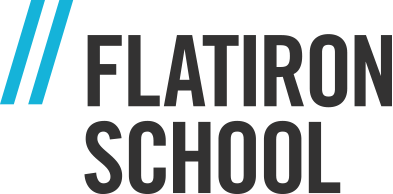

In [11]:
# Code here  
import requests

url = 'http://httpbin.org/post'  
file_list = [  
    ('image', ('fi.png', open('images/fi.png', 'rb'), 'image/png')),
    ('image', ('fi2.jpeg', open('images/fi2.jpeg', 'rb'), 'image/jpeg'))
]

r = requests.post(url, files=file_list)  
print(r.text)  

This was a brief introduction to how you would send requests and get responses from a web server, while totally avoiding the web browser interface. Later we'll see how we can pick up the required data elements from the contents of the web page for analytical purposes. 

## Summary
In this lesson, we provided an introduction to the `requests` library in python. We saw how to use the get method to send requests to web servers, check server status, look at the header elements of a web page and how to send extra parameters like user information. 